In [122]:
from aocd import get_data
data = get_data(day=4, year=2025)

In [89]:
data = '''..@@.@@@@.
@@@.@.@.@@
@@@@@.@.@@
@.@@@@..@.
@@.@@@@.@@
.@@@@@@@.@
.@.@.@.@@@
@.@@@.@@@@
.@@@@@@@@.
@.@.@@@.@.'''

In [61]:
import numpy as np
from scipy import ndimage
%matplotlib inline
import matplotlib.pyplot as plt

def render(i):
    plt.axis('off')
    plt.imshow(np.invert(i), cmap='hot', interpolation='none')

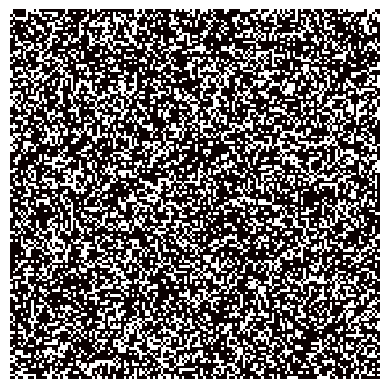

In [123]:
board = np.array([ list(y) for y in data.splitlines() ])
nm = np.where(board == '@', 1, 0)
render(nm)

In [124]:
kernel = np.ones((3, 3))
kernel[1,1] = 0
nm_sum = ndimage.convolve(nm, kernel, mode='constant', cval=0)
((nm == 1) & (nm_sum < 4)).sum()

1569

In [125]:
nm = np.where(board == '@', 1, 0)

frames = [ np.invert(nm) ]
total = 0
while True:
    nm_sum = ndimage.convolve(nm, kernel, mode='constant', cval=0)
    remove = ((nm == 1) & (nm_sum < 4))
    if remove.sum() <= 0:
        break
    total += remove.sum()
    nm = (nm - remove)
    frames.append(np.invert(nm))
total    

9280

MovieWriter ffmpeg unavailable; using Pillow instead.


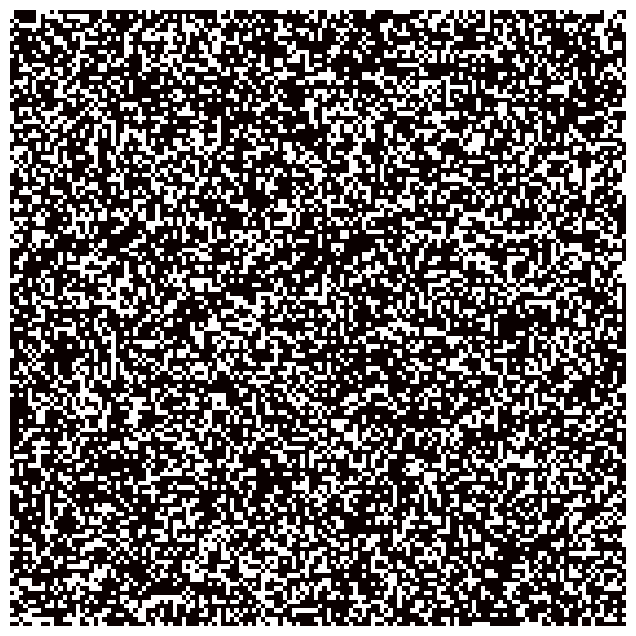

In [127]:
import matplotlib.animation as animation

fig = plt.figure( figsize=(8,8) )
plt.axis('off')
im = plt.imshow(frames[0], interpolation='none', cmap='hot')
def ani(i):
    im.set_array(frames[i])
    return [im]
anim = animation.FuncAnimation(fig, 
                               ani, 
                               frames = len(frames),
                               interval = 1000 / len(frames), # in ms
                               )
anim.save('day04.gif',fps=10)